<a href="https://colab.research.google.com/github/juan-medinaf/CHL5230-Team8-Datathon4/blob/main/Datathon_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
from scipy.stats import chi2
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t
# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from google.colab import files
imported= files.upload()

Saving datathon4.csv to datathon4.csv


In [ ]:
df= pd.read_csv(io.BytesIO(imported['datathon4.csv']))

In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
#Notice that the target variable hospital_death has a significant class imbalance
print(len(df[df['hospital_death']==0]))
print(len(df[df['hospital_death']==1]))

83798
7915


In [ ]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [ ]:
#Because certain biological measurents that may be taken at more critical stages are mainly missing (which may also be an indication that they are not MCAR),
#in order to include them in our model we decide to make a binary variable that is 1 if a measurement is present and 0 if it is not, also since imputation
#would not appropriate in this case.
print(df['d1_lactate_max'].isnull().sum())
print(df['h1_albumin_min'].isnull().sum())
print(df['h1_arterial_ph_max'].isnull().sum())
df['d1_lactate_max_measured']=1
df.loc[df['d1_lactate_max'].isin([np.nan]), 'd1_lactate_max_measured'] = 0
df['h1_albumin_min_measured']=1
df.loc[df['h1_albumin_min'].isin([np.nan]), 'h1_albumin_min_measured'] = 0
df['h1_arterial_ph_max_measured']=1
df.loc[df['h1_arterial_ph_max'].isin([np.nan]), 'h1_arterial_ph_max_measured'] = 0

68396
83824
76424


In [ ]:
#check that they were created properly
print(len(df[df['d1_lactate_max_measured']==0]))
print(len(df[df['h1_albumin_min_measured']==0]))
print(len(df[df['h1_arterial_ph_max_measured']==0]))

68396
83824
76424


In [ ]:
#Choose social and behavioral (proxies) features of interest, controlling for some biological and procedural features
df_sb = df[['age', 'ethnicity','gender','aids','cirrhosis','weight','hospital_death','diabetes_mellitus','sodium_apache','heart_rate_apache','gcs_motor_apache', 'd1_sysbp_noninvasive_min','d1_temp_min','gcs_verbal_apache', 'ventilated_apache','d1_lactate_max_measured','h1_albumin_min_measured','h1_arterial_ph_max_measured']]

In [ ]:
# checking the data types
df_sb.dtypes

age                            float64
ethnicity                       object
gender                          object
aids                           float64
cirrhosis                      float64
weight                         float64
hospital_death                   int64
diabetes_mellitus              float64
sodium_apache                  float64
heart_rate_apache              float64
gcs_motor_apache               float64
d1_sysbp_noninvasive_min       float64
d1_temp_min                    float64
gcs_verbal_apache              float64
ventilated_apache              float64
d1_lactate_max_measured          int64
h1_albumin_min_measured          int64
h1_arterial_ph_max_measured      int64
dtype: object

In [ ]:
# Check for missing values in each column
print(df_sb.isnull().sum())

age                             4228
ethnicity                       1395
gender                            25
aids                             715
cirrhosis                        715
weight                          2720
hospital_death                     0
diabetes_mellitus                715
sodium_apache                  18600
heart_rate_apache                878
gcs_motor_apache                1901
d1_sysbp_noninvasive_min        1027
d1_temp_min                     2324
gcs_verbal_apache               1901
ventilated_apache                715
d1_lactate_max_measured            0
h1_albumin_min_measured            0
h1_arterial_ph_max_measured        0
dtype: int64


In [ ]:
# For missing values in particularly sensitive features (and hence likely not at random) we decide to make missing as another category named 'Unknown'
df_sb['ethnicity'].fillna('Unknown', inplace=True)
df_sb['aids'].fillna('Unknown', inplace=True)
#Replace values in 'aids' variable to string
df_sb.loc[df_sb['aids'].isin([0.0]), 'aids'] = 'no'
df_sb.loc[df_sb['aids'].isin([1.0]), 'aids'] = 'yes'
set(df_sb['aids'])

{'Unknown', 'no', 'yes'}

In [ ]:
# Dealing with gender, only 25 missing values,
# so we decide to drop these 25 rather than creating a new category
# since we get a large dataset.
df_sb=df_sb.dropna(subset=['gender'])

In [ ]:
print(df_sb['gender'].isnull().sum())
print(df_sb['aids'].isnull().sum())

0
0


In [ ]:
# Create dummy variable for gender named is_male
df_sb['is_male']=1
df_sb.loc[df_sb['gender'].isin(['F']), 'is_male']=0
#Drop gender variable
df_sb=df_sb.drop('gender',axis=1)

In [ ]:
set(df_sb['is_male'])

{0, 1}

<Axes: >

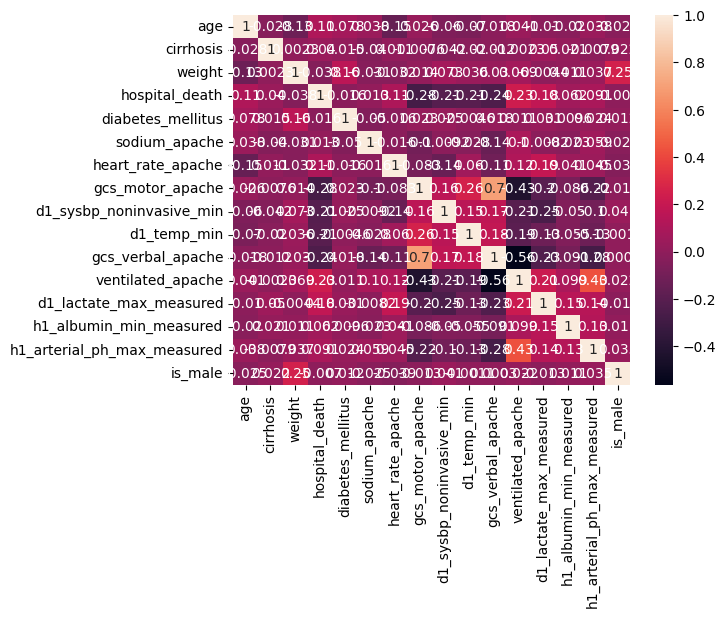

In [ ]:
#check for correlations
corr_matrix= df_sb.corr()
sns.heatmap(corr_matrix,annot=True)

Split Data into Train, Validation and Test Sets

In [ ]:
# Randomly sample 60% of the data for training
train_data = df_sb.sample(frac = .6, random_state=10)

# Use the remaining 40% for testing (But further subdivided into Validation and Test Sets)
test_data = df_sb.drop(train_data.index)

In [ ]:
#Randomly sample 50% of testing data for validation
validation= test_data.sample(frac=.5,random_state=10)
test= test_data.drop(validation.index)

Feature Engineering and Preprocessing on the Training, Validation and Test Sets

In [ ]:
# Extract the 'hospital_death' column as the target variable for training, validation and testing
Y_train = train_data['hospital_death']
Y_validation = validation['hospital_death']
Y_test = test['hospital_death']

# Extract the features (excluding 'DEATH_EVENT') for training, validation and testing
X_train = train_data.drop('hospital_death', axis=1)
X_validation = validation.drop('hospital_death', axis=1)
X_test = test.drop('hospital_death', axis=1)

In [ ]:
# Target Encoding Ethnicity and aids
encoder= ce.TargetEncoder(cols=['ethnicity','aids'])
X_train[['ethnicity','aids']]= encoder.fit_transform(X_train[['ethnicity','aids']],Y_train)

In [ ]:
X_validation[['ethnicity','aids']]= encoder.transform(X_validation[['ethnicity','aids']])
X_test[['ethnicity','aids']]= encoder.transform(X_test[['ethnicity','aids']])

In [ ]:
# Imputing missing values in categories we consider could be missing randomly with KKN Imputer
imputer= KNNImputer(missing_values=np.nan, n_neighbors=5)
X_train= imputer.fit_transform(X_train)
X_validation= imputer.transform(X_validation)
X_test= imputer.transform(X_test)

In [ ]:
#Given that the target class has a significant imbalace, we use SMOTE (upsampling of minority class)
smote= SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
#check new balance
print(len(Y_train[Y_train==0])/len(Y_train))
print(len(Y_train[Y_train==1])/len(Y_train))

0.5
0.5


In [ ]:
# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

Neural Network Model

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((17, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.tensor(X_train).type(t.float32)
Y = t.tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters (which we reached after some innitial trials)
epochs = 1500
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    print('Process:', epoch)
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51
Process: 52
Process: 53
Process: 54
Process: 55
Process: 56
Process: 57
Process: 58
Process: 59
Process: 60
Process: 61
Process: 62
Process: 63
Process: 64
Process: 65
Process: 66
Process: 67
Process: 68
Process: 69
Process: 70
Process: 71
Process: 72
Process: 73
Process: 74
Process: 75
Process: 76
Process: 77
Process: 78
Process: 79
Process: 80
Process: 81
Process: 82
Process: 83
Pr

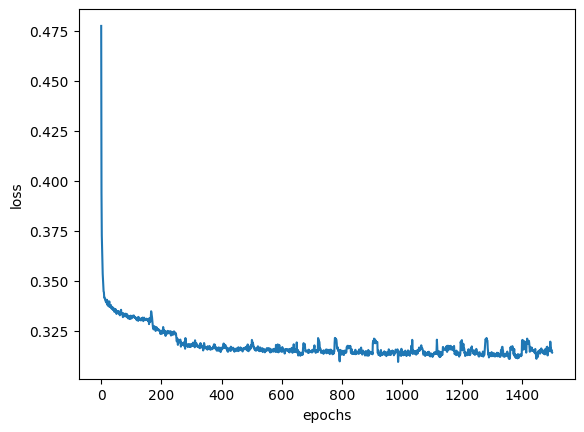

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_validation).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_validation.to_numpy()).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.37273189425468445
0.31243523955345154


In [ ]:
# Defining the parameters
number_of_input_features = 17
number_of_hidden_units = 5
epochs = 1500
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_validation_tensor = t.Tensor(X_validation).type(t.float32)
Y_validation_tensor = t.Tensor(Y_validation.to_numpy()).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = t.nn.BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction_train = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_validation_tensor)
        prediction_validation = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction_validation == Y_validation_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1500 ---> train_accuracy : 0.8378673791885376 , validation_accuracy : 0.8442032933235168
epoch 1/1500 ---> train_accuracy : 0.8469454646110535 , validation_accuracy : 0.8694514036178589
epoch 2/1500 ---> train_accuracy : 0.834506630897522 , validation_accuracy : 0.8707601428031921
epoch 3/1500 ---> train_accuracy : 0.8561528325080872 , validation_accuracy : 0.8508561253547668
epoch 4/1500 ---> train_accuracy : 0.8534184694290161 , validation_accuracy : 0.8547824025154114
epoch 5/1500 ---> train_accuracy : 0.8526726961135864 , validation_accuracy : 0.8494928479194641
epoch 6/1500 ---> train_accuracy : 0.8500477075576782 , validation_accuracy : 0.8625258803367615
epoch 7/1500 ---> train_accuracy : 0.8550093173980713 , validation_accuracy : 0.8565274477005005
epoch 8/1500 ---> train_accuracy : 0.8551485538482666 , validation_accuracy : 0.8457847237586975
epoch 9/1500 ---> train_accuracy : 0.8548701405525208 , validation_accuracy : 0.8522739410400391
epoch 10/1500 ---> train_accura

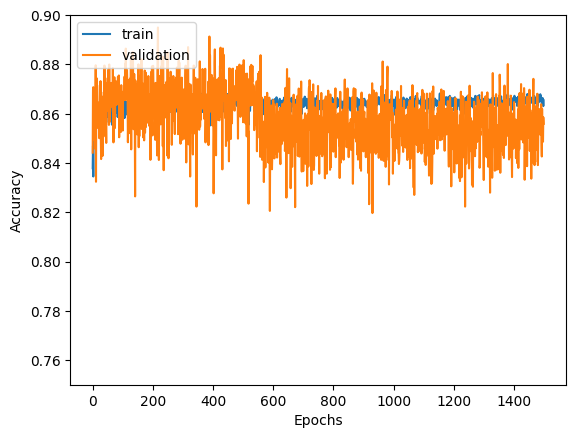

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.show()

In [ ]:
# Evaluate the model
# Training set
conf_matrix = confusion_matrix(Y_train, prediction_train)
class_report = classification_report(Y_train, prediction_train)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[44585  5701]
 [ 7833 42453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     50286
           1       0.88      0.84      0.86     50286

    accuracy                           0.87    100572
   macro avg       0.87      0.87      0.87    100572
weighted avg       0.87      0.87      0.87    100572



In [ ]:
# Evaluate the model
# validation set
conf_matrix = confusion_matrix(Y_validation, prediction_validation)
class_report = classification_report(Y_validation, prediction_validation)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[14832  1896]
 [  747   863]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     16728
           1       0.31      0.54      0.40      1610

    accuracy                           0.86     18338
   macro avg       0.63      0.71      0.66     18338
weighted avg       0.90      0.86      0.87     18338



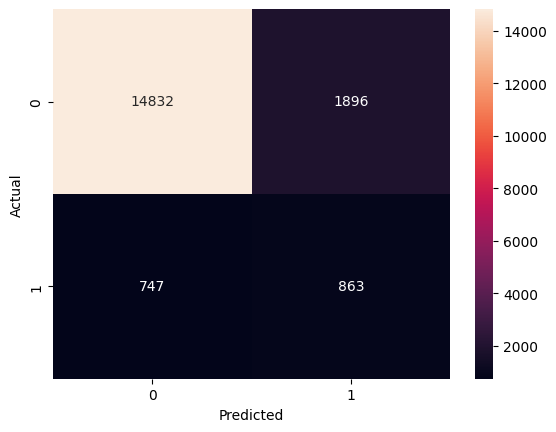

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Compare model performance with Logistic Regression and Bernoulli Naïve Bayes Classifier

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 100, 'penalty': 'l1'}


In [ ]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_train)

# Evaluate the model
conf_matrix = confusion_matrix(Y_train, y_pred)
class_report = classification_report(Y_train, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[38598 11688]
 [12368 37918]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     50286
           1       0.76      0.75      0.76     50286

    accuracy                           0.76    100572
   macro avg       0.76      0.76      0.76    100572
weighted avg       0.76      0.76      0.76    100572



In [ ]:
# Use the optimal model to make predictions on the validation data
y_pred = grid_search.predict(X_validation)

# Evaluate the model
conf_matrix = confusion_matrix(Y_validation, y_pred)
class_report = classification_report(Y_validation, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[12880  3848]
 [  463  1147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     16728
           1       0.23      0.71      0.35      1610

    accuracy                           0.76     18338
   macro avg       0.60      0.74      0.60     18338
weighted avg       0.90      0.76      0.81     18338



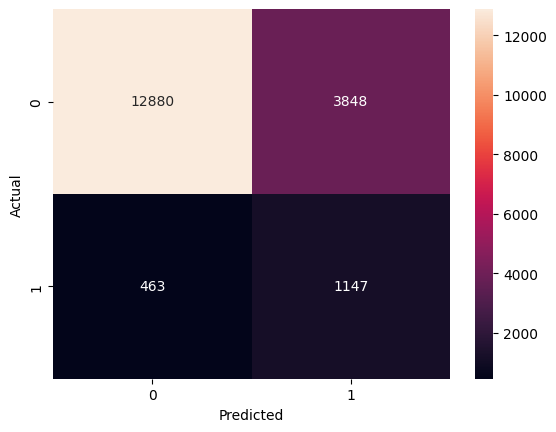

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'binarize': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
clf = BernoulliNB(fit_prior=True, class_prior=None)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'alpha': 0.001, 'binarize': 0.6}


In [ ]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_train)

# Evaluate the model
conf_matrix = confusion_matrix(Y_train, y_pred)
class_report = classification_report(Y_train, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[34673 15613]
 [10321 39965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     50286
           1       0.72      0.79      0.76     50286

    accuracy                           0.74    100572
   macro avg       0.74      0.74      0.74    100572
weighted avg       0.74      0.74      0.74    100572



In [ ]:
# Use the optimal model to make predictions on the test data
y_pred = grid_search.predict(X_validation)

# Evaluate the model
conf_matrix = confusion_matrix(Y_validation, y_pred)
class_report = classification_report(Y_validation, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[11544  5184]
 [  478  1132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     16728
           1       0.18      0.70      0.29      1610

    accuracy                           0.69     18338
   macro avg       0.57      0.70      0.54     18338
weighted avg       0.89      0.69      0.76     18338



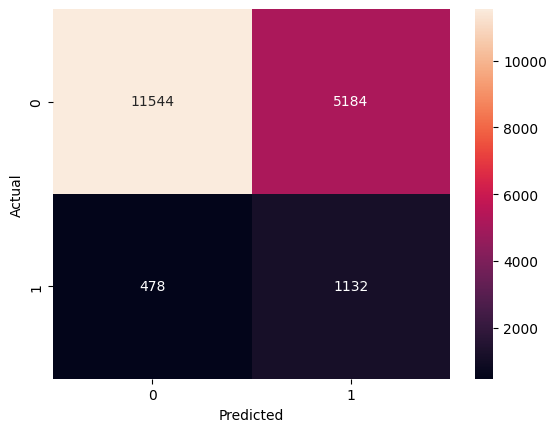

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()